In [ ]:
#10.1.1 희소표현(Sparse Representation)

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import torch

class2=pd.read_csv("data/class2.csv")

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()
print(class2[:6])
train_x = label_encoder.fit_transform(class2['class2']) #컬럼 class2의 값들을 one-hot encoding > N I B를 인코딩: 그림 10.1  
train_x

   Unnamed: 0      id tissue class class2      x      y      r
0           0  CID000      C  CIRC      N  535.0  475.0  192.0
1           1  CID001      A  CIRA      N  433.0  268.0   58.0
2           2  CID002      A  CIRA      I    NaN    NaN    NaN
3           3  CID003      C  CIRC      B    NaN    NaN    NaN
4           4  CID004      F  CIRF      I  488.0  145.0   29.0
5           5  CID005      C  CIRC      B  532.0  199.0   21.0


array([2, 2, 1, 0, 1, 0])

In [ ]:
#10.1.2 횟수기반 임베딩
#Counter Vector

토큰화: 텍스트를 공백 또는 구두점을 기준으로 나누어 단어(토큰)를 추출합니다.
소문자 변환: 기본적으로 CountVectorizer는 대소문자를 구분하지 않으므로 모든 단어를 소문자로 변환합니다.
중복 제거 및 정렬: 중복된 단어를 제거하고, 고유 단어를 사전 순서로 정렬합니다.
숫자 매핑: 정렬된 단어 목록에서 각 단어에 0부터 시작하는 인덱스를 부여합니다.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_ ## 인코딩할 때 해당되는 인덱스 - 알파벳 순서로 

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [3]:
vect.transform(['any chance chance never get any chance.']).toarray()
### 단어의 인덱스에 따라 해당 단어가 문장에 나타나는 횟수 - 해당 단어들의 빈도

array([[0, 2, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [5]:
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
# stop_words 매개변수는 텍스트에서 **분석에 불필요한 단어들(불용어)**을 지정하여 제거하는 데 사용됩니다. 
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [8]:
vect.transform(['and any last chance and chance never will get any chance to you.']).toarray()

array([[2, 3, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]], dtype=int64)

In [ ]:
#TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc = ['I like machine learning', 'I like love deep learning', 'I like run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1) # min_df는 1번만 나와도 계산에 포함한다는 뜻
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T) # 각 문장 간의 유사도 계산
print ('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), 'matrix를 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 matrix를 만들었습니다.
[[1.         0.39038344 0.16395271]
 [0.39038344 1.         0.13303222]
 [0.16395271 0.13303222 1.        ]]


In [13]:
print(tfidf_matrix.toarray()) ##각 행은 각 문장에 대한 tf-idf 값을 계산


[[0.         0.         0.54783215 0.42544054 0.         0.72033345
  0.        ]
 [0.5844829  0.         0.44451431 0.34520502 0.5844829  0.
  0.        ]
 [0.         0.65249088 0.         0.38537163 0.         0.
  0.65249088]]


In [ ]:
#10.1.3 예측기반 임베딩
# Word2Vec

1. Word2Vec의 동작 원리
Word2Vec은 단어를 벡터로 표현하여 의미적으로 유사한 단어들이 가까운 위치에 있도록 학습합니다.

단어의 벡터화: 각 단어는 고정된 크기의 벡터(예: 100차원)로 변환됩니다.
벡터 간 거리: 두 단어 벡터 간의 유사성은 주로 코사인 유사도(Cosine Similarity)로 측정됩니다.
코사인 유사도가 높을수록 두 단어는 의미적으로 유사합니다.
 > 유사한 의미를 가진 단어는 가까운 벡터를 가집니다.
 >> 예: "king"과 "queen"의 벡터는 유사.

Word2Vec은 기존 문장들을 미리 학습한 결과를 기반으로 단어 벡터를 생성합니다. 이를 **사전 학습(Pre-training)**이라고 하며, 주어진 텍스트 데이터에서 단어 간의 의미적 관계를 학습합니다.

1. 기존 문장 학습 과정
Word2Vec은 주어진 텍스트 데이터에서 단어가 나타나는 **문맥(Context)**을 학습하여 단어를 고차원 벡터로 변환합니다. 
 - 단어의 공동 발생 패턴 학습
    > Word2Vec는 코퍼스에서 단어의 공동 발생 패턴을 이용합니다.
    > 문장에서 자주 함께 나타나는 단어들(예: "king"과 "queen")은 비슷한 문맥을 공유하므로, 학습된 벡터 공간에서 가까운 위치에 배치됩니다.
    > 예:
      "king is a royal"과 "queen is a royal"은 비슷한 문맥을 가지므로, "king"과 "queen"은 유사한 벡터를 가집니다.

구글링: 쉽게 씌어진 word2vec, Aug  16 2017 dreamgonfly

구글링: [NLP] Word Embedding, Word2Vec, Velog, nkw011, 22.7.18

In [5]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
nltk.download("popular")
# 예를 들어, popular 명령어는 WordNet과 같은 어휘 데이터, 말뭉치 데이터, 트리뱅크 형태소 분석기와 같은 도구 등을 포함

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\bhhong/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\bhhong/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\bhhong/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\bhhong/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\bhhong/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\bhhong/nltk_data...
[nltk_data]    |   Package movie_review

True

In [7]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec
import os
print(os.getcwd())
sample = open("data/peter.txt", "r", encoding='UTF8')
s = sample.read()

f = s.replace("\n", " ")
data = []

for i in sent_tokenize(f):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

data

c:\Users\bhhong\OneDrive\K디지털202209강의\강의2022\텐서플로우_딥러닝\딥러닝파이토치교과서\080289-main\080289-main\chap10


[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

#CBOW

CBOW (Continuous Bag of Words)

- 목표: 주변 단어(Context Words)를 보고 중심 단어(Target Word)를 예측.
    > 예: 문장 "The cat sat on the mat"에서 중심 단어가 sat라면, The, cat, on, the를 사용해 sat를 예측.
- 학습 방법:
    > 중심 단어를 예측하는 과정에서 주변 단어와 의미적으로 유사한 단어들은 벡터 공간에서 가까워지도록 학습.
    > 단어 벡터는 의미적으로 유사한 문맥에서 자주 나타나는 단어들끼리 비슷해짐.

In [9]:
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg=0)#SG=0은 CBOW 사용
print("Cosine similarity between 'peter' " +
                 "wendy' - CBOW : ",
      model1.wv.similarity('peter', 'wendy'))

#model1 = gensim.models.Word2Vec(data, min_count = 1,vector_size = 100, window = 5)

Cosine similarity between 'peter' wendy' - CBOW :  0.074393824


In [10]:
print("Cosine similarity between 'peter' " +
                 "hook' - CBOW : ",
      model1.wv.similarity('peter', 'pan'))

Cosine similarity between 'peter' hook' - CBOW :  0.03580514


Skip-gram

- 목표: 중심 단어(Target Word)를 보고 주변 단어(Context Words)를 예측.
    > 예: 중심 단어가 sat라면, The, cat, on, the를 예측.
-  학습 방법:
    > 중심 단어에서 파생된 주변 단어가 학습되며, 이 과정에서 유사한 문맥에서 사용되는 단어들의 벡터가 가까워짐.

In [11]:
#Skip-gram

In [12]:
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)#sg는 skip-gram
print("Cosine similarity between 'peter' " +
          "wendy' - Skip Gram : ",
    model2.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' wendy' - Skip Gram :  0.4008868


In [13]:
print("Cosine similarity between 'peter' " +
            "hook' - Skip Gram : ",
      model2.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' hook' - Skip Gram :  0.52016735


In [ ]:
#FastText
#FastText는 교재대로 진행하면 코랩에서 오류가 발생하여 새로운 코드를 삽입했습니다.

In [17]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText('data/peter.txt', vector_size=4, window=3,min_count=1,epochs=10)

In [18]:
sim_score = model.wv.similarity('peter','wendy')
print(sim_score)

0.4592452


In [19]:
sim_score = model.wv.similarity('peter','hook')
print(sim_score)

0.043825716


In [20]:
from __future__ import print_function
from gensim.models import keyedvectors
model_kr = keyedvectors.load_word2vec_format('data/wiki.ko.vec') ## 2분가량 소요 

In [21]:
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1: 2f}".format(
        similar_word[0],similar_word[1]
    ))


Word: 노력함, Similarity:  0.796721
Word: 노력중, Similarity:  0.750231
Word: 노력만, Similarity:  0.719530
Word: 노력과, Similarity:  0.713725
Word: 노력의, Similarity:  0.694487
Word: 노력가, Similarity:  0.693182
Word: 노력이나, Similarity:  0.685509
Word: 노력없이, Similarity:  0.676122
Word: 노력맨, Similarity:  0.675671
Word: 노력보다는, Similarity:  0.675314


In [22]:
similarities = model_kr.most_similar(positive=['동물','육식동물'], negative=['사람'])
print(similarities)

[('초식동물', 0.7804121971130371), ('거대동물', 0.7547270059585571), ('육식동물의', 0.7547166347503662), ('유두동물', 0.753511369228363), ('반추동물', 0.7470757961273193), ('독동물', 0.7466291785240173), ('육상동물', 0.7460315823554993), ('유즐동물', 0.7450904250144958), ('극피동물', 0.7449344396591187), ('복모동물', 0.742434561252594)]


In [ ]:
#10.1.4 횟수/예측기반 임베딩
#GloVe

In [25]:
%pwd

'c:\\Users\\bhhong\\OneDrive\\K디지털202209강의\\강의2022\\텐서플로우_딥러닝\\딥러닝파이토치교과서\\080289-main\\080289-main\\chap10'

In [ ]:


import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
# 교재 코드대로 하면 상대경로에 에러가 발생하므로 교재 560페이지 하단 주석에서 해당 파일을 다운로드 받아
## 절대 경로로 수정하는 것이 필요함 
glove_file = datapath(r'C:\Users\bhhong\OneDrive\K디지털202209강의\강의2022\텐서플로우_딥러닝\딥러닝파이토치교과서\080289-main\080289-main\chap10\data\glove.6B\glove.6B.100d.txt')                                    # PC에서 불러온다면 주석 해제 후 실습
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [33]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

[('legislation', 0.8072139620780945),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142541408538818),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140654563904)]

In [34]:
model.most_similar('cherry')

[('peach', 0.688809871673584),
 ('mango', 0.683819055557251),
 ('plum', 0.6684104204177856),
 ('berry', 0.659035861492157),
 ('grove', 0.6581551432609558),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098021507263),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212737083435)]

In [35]:
model.most_similar(negative='cherry')

[('kazushige', 0.48343509435653687),
 ('askerov', 0.4778185784816742),
 ('lakpa', 0.46915262937545776),
 ('ex-gay', 0.45713329315185547),
 ('tadayoshi', 0.4522106647491455),
 ('turani', 0.4481006860733032),
 ('saglam', 0.4469599425792694),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423118233680725)]

In [36]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [37]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [38]:
analogy('tall', 'tallest', 'long')

'longest'

In [39]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


10.2 트랜스포머 어텐션

구글링: 16-01 트랜스포머(Transformer) - 딥러닝을 이용한 자연어, 위키독스
 > 14-01 시퀀스-투-시퀀스
 > 15-01 어텐션 메커니즘
 > 16-01 트랜스포머

In [ ]:
#10.2 Transformer attention
#10.2.1 Seq2seq

In [3]:
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os
import re
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
print(device)

cuda


In [5]:
import re
com = re.compile('[cats]')
com.findall('I love cats')


['c', 'a', 't', 's']

In [6]:
# 코드 10-26 데이터 준비
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 20

class Lang:
    def __init__(self):
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [7]:
def normalizeString(df, lang):
    sentence = df[lang].str.lower()
    sentence = sentence.str.replace('[^A-Za-z\s]+', '')
    sentence = sentence.str.normalize('NFD')
    sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')
    return sentence

def read_sentence(df, lang1, lang2):
    sentence1 = normalizeString(df, lang1)
    sentence2 = normalizeString(df, lang2)
    return sentence1, sentence2

def read_file(loc, lang1, lang2):
    df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])
    return df

def process_data(lang1,lang2):
    df = read_file('data/eng-fra.txt', lang1, lang2) 
    sentence1, sentence2 = read_sentence(df, lang1, lang2)

    input_lang = Lang()
    output_lang = Lang()
    pairs = []
    for i in range(len(df)):
        if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:
            full = [sentence1[i], sentence2[i]]
            input_lang.addSentence(sentence1[i])
            output_lang.addSentence(sentence2[i])
            pairs.append(full)

    return input_lang, output_lang, pairs

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25684\762917835.py:3: SyntaxWarning: invalid escape sequence '\s'
  sentence = sentence.str.replace('[^A-Za-z\s]+', '')


In [8]:
# 코드 10-28 텐서로 변환
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1) # 문장 끝에 토큰 추가

def tensorsFromPair(input_lang, output_lang, pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [9]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
        super(Encoder, self).__init__()
        self.input_dim = input_dim
        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_dim, self.embbed_dim)
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)

    def forward(self, src):
        embedded = self.embedding(src).view(1,1,-1)
        outputs, hidden = self.gru(embedded)
        return outputs, hidden

In [10]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
        super(Decoder, self).__init__()

        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        self.embedding = nn.Embedding(output_dim, self.embbed_dim)
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
        self.out = nn.Linear(self.hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        input = input.view(1, -1)
        embedded = F.relu(self.embedding(input))
        output, hidden = self.gru(embedded, hidden)
        prediction = self.softmax(self.out(output[0]))
        return prediction, hidden

In [11]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, input_lang, output_lang, teacher_forcing_ratio=0.5):

        input_length = input_lang.size(0)
        batch_size = output_lang.shape[1]
        target_length = output_lang.shape[0]
        vocab_size = self.decoder.output_dim
        outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)

        for i in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_lang[i])

        decoder_hidden = encoder_hidden.to(device)
        decoder_input = torch.tensor([SOS_token], device=device)

        for t in range(target_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio ##티처포스
            topv, topi = decoder_output.topk(1)
            input = (output_lang[t] if teacher_force else topi)
            if(teacher_force == False and input.item() == EOS_token):
                break
        return outputs

In [12]:
teacher_forcing_ratio = 0.5

def Model(model, input_tensor, target_tensor, model_optimizer, criterion):
    model_optimizer.zero_grad()
    input_length = input_tensor.size(0)
    loss = 0
    epoch_loss = 0
    output = model(input_tensor, target_tensor)
    num_iter = output.size(0)

    for ot in range(num_iter):
        loss += criterion(output[ot], target_tensor[ot])

    loss.backward()
    model_optimizer.step()
    epoch_loss = loss.item() / num_iter
    return epoch_loss

In [16]:
def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()
    total_loss_iterations = 0

    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(num_iteration)]

    for iter in range(1, num_iteration+1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, optimizer, criterion)
        total_loss_iterations += loss

        if iter % 5000 == 0:
            avarage_loss= total_loss_iterations / 5000
            total_loss_iterations = 0
            print('%d %.4f' % (iter, avarage_loss))

    torch.save(model.state_dict(), 'data/mytraining.pt')
    return model

In [17]:
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentences[0])
        output_tensor = tensorFromSentence(output_lang, sentences[1])
        decoded_words = []
        output = model(input_tensor, output_tensor)

        for ot in range(output.size(0)):
            topv, topi = output[ot].topk(1)

            if topi[0].item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi[0].item()])
    return decoded_words

def evaluateRandomly(model, input_lang, output_lang, pairs, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('input {}'.format(pair[0]))
        print('output {}'.format(pair[1]))
        output_words = evaluate(model, input_lang, output_lang, pair)
        output_sentence = ' '.join(output_words)
        print('predicted {}'.format(output_sentence))

In [18]:
lang1 = 'eng'
lang2 = 'fra'
input_lang, output_lang, pairs = process_data(lang1, lang2)

randomize = random.choice(pairs)
print('random sentence {}'.format(randomize))

input_size = input_lang.n_words
output_size = output_lang.n_words
print('Input : {} Output : {}'.format(input_size, output_size))

embed_size = 256
hidden_size = 512
num_layers = 1
num_iteration = 75000

encoder = Encoder(input_size, hidden_size, embed_size, num_layers)
decoder = Decoder(output_size, hidden_size, embed_size, num_layers)

model = Seq2Seq(encoder, decoder, device).to(device)

print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)

random sentence ['how is your new class?', 'comment est ta nouvelle classe?']
Input : 23191 Output : 39387
Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512)
)
Decoder(
  (embedding): Embedding(39387, 256)
  (gru): GRU(256, 512)
  (out): Linear(in_features=512, out_features=39387, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5000 5.0600
10000 4.7599
15000 4.6833
20000 4.6897
25000 4.6897
30000 4.6482
35000 4.6222
40000 4.6155
45000 4.6068
50000 4.5937
55000 4.5365
60000 4.6001
65000 4.6008
70000 4.5523
75000 4.5580


In [ ]:
evaluateRandomly(model, input_lang, output_lang, pairs)

input can i get you anything else
output puisje vous procurer quoi que ce soit dautre 
predicted je le pas le <EOS>
input she is indeed a lovely girl
output cest vraiment une fille adorable
predicted je le pas le <EOS>
input its about time you got a haircut
output il serait temps que tu te coupes les cheveux
predicted je le pas le <EOS>
input poyang lake is the largest freshwater lake in china
output le lac poyang est le plus grand lac deau douce de chine
predicted je le pas le <EOS>
input you look surprised
output vous avez lair surpris
predicted je le pas le <EOS>
input in hindsight this was a mistake
output avec le recul ctait une erreur
predicted je le pas le <EOS>
input it could be a trap
output cela pourrait tre un pige
predicted je le pas le <EOS>
input shall we walk or drive
output nous y allons  pied ou en voiture
predicted je le pas le <EOS>
input i feel like throwing up
output jai envie de dgueuler
predicted je le pas le <EOS>
input youre adorable
output vous tes adorables
p

In [19]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length) # 어텐션 - 최대 길이
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))# 어텐션의 가중치와 인코더 출력 곱

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

In [21]:
# 코드 10-38 어텐션 디코더 모델 학습을 위한 함수

def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0
    plot_loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % 5000 == 0:
            print_loss_avg = print_loss_total / 5000
            print_loss_total = 0
            print('%d,  %.4f' % (iter, print_loss_avg))

In [22]:
# 어텐션 디코더 모델 훈련

import time

embed_size = 256
hidden_size = 512
num_layers = 1
input_size = input_lang.n_words
output_size = output_lang.n_words

encoder1 = Encoder(input_size, hidden_size, embed_size, num_layers)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_size, dropout_p=0.1).to(device)

print(encoder1)
print(attn_decoder1)

attn_model = trainIters(encoder1, attn_decoder1, 75000, print_every=5000, plot_every=100, learning_rate=0.01)

Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512)
)
AttnDecoderRNN(
  (embedding): Embedding(39387, 512)
  (attn): Linear(in_features=1024, out_features=20, bias=True)
  (attn_combine): Linear(in_features=1024, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (gru): GRU(512, 512)
  (out): Linear(in_features=512, out_features=39387, bias=True)
)
5000,  5.3841
10000,  5.3769
15000,  5.3590
20000,  5.3896
25000,  5.3826
30000,  5.3267
35000,  5.3641
40000,  5.3706
45000,  5.3431
50000,  5.3366
55000,  5.3487
60000,  5.3951
65000,  5.3440
70000,  5.3603
75000,  5.3934


1. 사전 학습된 모델 사용: 텍스트 분석에서 사전 학습된 모델을 사용하는 것이 가장 빠르고 쉬운 방법입니다. 이 경우 Transformer의 깊은 이해는 필요 없으며 기본 개념만 알면 됩니다.
 - PyTorch로 간단한 텍스트 데이터 전처리와 모델 학습.
 - Hugging Face Transformers 라이브러리로 사전 학습된 모델 사용.

2. 커스텀 작업: 작업이 고도화되거나 새로운 모델 설계를 해야 한다면, PyTorch로 Attention과 Transformer 구조를 직접 구현하는 방향으로 학습 범위를 넓히세요.

3. 모델 설계 구현: 학습 난이도가 높게 느껴진다면, 도구 활용에 집중하며 점차적으로 이론을 보완하세요.

    > 추천 학습 경로는 기본 모델 사용 → 필요에 따라 응용

In [ ]:
#10.2.1 Bert

In [23]:
%pip install transformers

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ------------ --------------------------- 3.1/10.1 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 27.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 45.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install pytorch-transformers

   ---------------------------------------- 0.0/897.5 kB ? eta -:--:--
   --------------------------------------- 897.5/897.5 kB 20.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   --------------------------------------- 992.0/992.0 kB 15.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------------------------------------- -- 12.6/13.3 MB 60.7 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 52.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install scikit-learn


  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [30]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from pytorch_transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
train_df = pd.read_csv('data/training.txt', sep='\t') 
valid_df = pd.read_csv('data/validing.txt', sep='\t') 
test_df = pd.read_csv('data/testing.txt', sep='\t') 

In [34]:
# 10% 만 사용
train_df = train_df.sample(frac=0.1, random_state=500)
valid_df = valid_df.sample(frac=0.1, random_state=500)
test_df = test_df.sample(frac=0.1, random_state=500)

In [35]:
class Datasets(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx, 1] # text만사용
        label = self.df.iloc[idx, 2] # label만 사용
        return text, label

In [37]:
train_dataset = Datasets(train_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

In [38]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

100%|██████████| 440473133/440473133 [01:01<00:00, 7155356.56B/s] 


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [39]:
def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    if save_path == None:
        return
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_metrics(load_path):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [41]:
def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          num_epochs = 5,
          eval_every = len(train_loader) // 2,
          best_valid_loss = float("Inf")):

    total_correct = 0.0
    total_len = 0.0
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    model.train()
    for epoch in range(num_epochs):
        for text, label in train_loader:
            optimizer.zero_grad()
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]

            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            outputs = model(sample, labels=labels)
            loss, logits = outputs

            pred = torch.argmax(F.softmax(logits), dim=1)
            correct = pred.eq(labels)
            total_correct += correct.sum().item()
            total_len += len(labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()
            global_step += 1

            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():
                    for text, label in valid_loader:
                        encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
                        padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]
                        sample = torch.tensor(padded_list)
                        sample, label = sample.to(device), label.to(device)
                        labels = torch.tensor(label)
                        outputs = model(sample, labels=labels)
                        loss, logits = outputs
                        valid_running_loss += loss.item()

                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                running_loss = 0.0
                valid_running_loss = 0.0
                model.train()

                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))

                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint('data/model.pt', model, best_valid_loss)
                    save_metrics('data/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

    save_metrics('data/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('훈련 종료!')

In [42]:
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25684\26153594.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25684\26153594.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = torch.argmax(F.softmax(logits), dim=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25684\26153594.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Epoch [1/5], Step [51/510], Train Loss: 0.7082, Valid Loss: 0.6953
Model saved to ==> data/model.pt
Model saved to ==> data/metrics.pt
Epoch [1/5], Step [102/510], Train Loss: 0.7037, Valid Loss: 0.7071
Epoch [2/5], Step [153/510], Train Loss: 0.7240, Valid Loss: 0.6932
Model saved to ==> data/model.pt
Model saved to ==> data/metrics.pt
Epoch [2/5], Step [204/510], Train Loss: 0.7211, Valid Loss: 0.7002
Epoch [3/5], Step [255/510], Train Loss: 0.6766, Valid Loss: 0.6935
Epoch [3/5], Step [306/510], Train Loss: 0.7077, Valid Loss: 0.6938
Epoch [4/5], Step [357/510], Train Loss: 0.7004, Valid Loss: 0.6942
Epoch [4/5], Step [408/510], Train Loss: 0.7038, Valid Loss: 0.6988
Epoch [5/5], Step [459/510], Train Loss: 0.6978, Valid Loss: 0.6936
Epoch [5/5], Step [510/510], Train Loss: 0.6923, Valid Loss: 0.7775
Model saved to ==> data/metrics.pt
훈련 종료!


Model loaded from <== data/metrics.pt


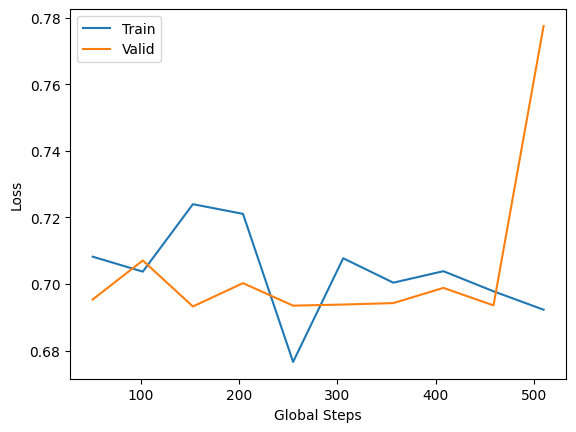

In [44]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics('data/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for text, label in test_loader:
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]

            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            output = model(sample, labels=labels)

            _, output = output
            y_pred.extend(torch.argmax(output, 1).tolist())
            y_true.extend(labels.tolist())

    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

Model loaded from <== data/model.pt
Classification 결과:
              precision    recall  f1-score   support

           1     0.4727    1.0000    0.6420        52
           0     0.0000    0.0000    0.0000        58

    accuracy                         0.4727       110
   macro avg     0.2364    0.5000    0.3210       110
weighted avg     0.2235    0.4727    0.3035       110



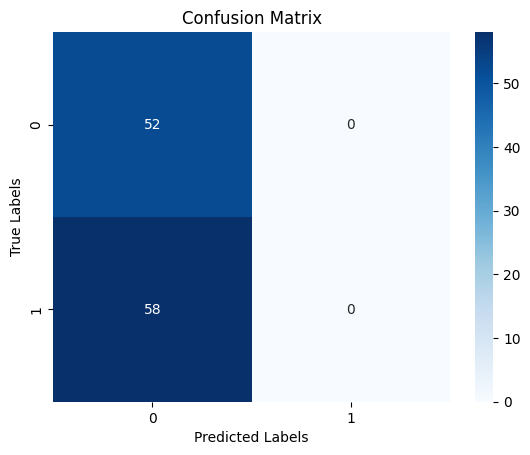

In [46]:
import warnings
warnings.filterwarnings('ignore')
best_model = model.to(device)
load_checkpoint('data/model.pt', best_model)
evaluate(best_model, test_loader)

In [ ]:
#10.3 한국어 임베딩

In [47]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # 한글처리 위한 버트 토큰나이저

In [48]:
text = "나는 파이토치를 이용한 딥러닝을 학습중이다."
marked_text = "[CLS] " + text + " [SEP]"
tokenized_text = tokenizer.tokenize(marked_text)
print(tokenized_text)

['[CLS]', '나는', '파', '##이', '##토', '##치를', '이', '##용한', '딥', '##러', '##닝', '##을', '학', '##습', '##중', '##이다', '.', '[SEP]']


In [49]:
text = "과수원에 사과가 많았다." \
       "친구가 나에게 사과했다."\
       "백설공주는 독이 든 사과를 먹었다."

marked_text = "[CLS] " + text + " [SEP]"
tokenized_text = tokenizer.tokenize(marked_text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# 토큰과 인덱스 출력
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
과             8,898
##수          15,891
##원에         108,280
사             9,405
##과          11,882
##가          11,287
많             9,249
##았다         27,303
.               119
친             9,781
##구          17,196
##가          11,287
나             8,982
##에게         26,212
사             9,405
##과          11,882
##했다         12,490
.               119
백             9,331
##설          31,928
##공          28,000
##주는         100,633
독             9,088
##이          10,739
든             9,115
사             9,405
##과          11,882
##를          11,513
먹             9,266
##었다         17,706
.               119
[SEP]           102


In [50]:
segments_ids = [1] * len(tokenized_text) # 하나의 문장으로 인식시키기 위해 토큰에 1 부여
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [51]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [52]:
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  output_hidden_states = True,) # 버트 모델의 은닉 상태

model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [53]:
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

In [54]:
print ("계층 수:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("배치 수:", len(hidden_states[layer_i]))
batch_i = 0

print ("토큰 수:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("은닉층 유닛 수:", len(hidden_states[layer_i][batch_i][token_i]))

계층 수: 13   (initial embeddings + 12 BERT layers)
배치 수: 1
토큰 수: 33
은닉층 유닛 수: 768


In [55]:
print('은닉 상태의 유형: ', type(hidden_states))
print('각 계층에서의 텐서 형태: ', hidden_states[0].size())

은닉 상태의 유형:  <class 'tuple'>
각 계층에서의 텐서 형태:  torch.Size([1, 33, 768])


In [56]:
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 33, 768])

In [57]:
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 33, 768])

In [58]:
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([33, 13, 768])

In [59]:
import torch
x = torch.rand(2,3,3)
y = x.permute(2,1,0)
print(x)
print(y) 

tensor([[[0.8551, 0.9379, 0.1111],
         [0.8305, 0.2858, 0.2539],
         [0.2325, 0.8390, 0.1434]],

        [[0.0716, 0.4229, 0.9433],
         [0.7855, 0.5910, 0.1018],
         [0.5846, 0.8044, 0.3947]]])
tensor([[[0.8551, 0.0716],
         [0.8305, 0.7855],
         [0.2325, 0.5846]],

        [[0.9379, 0.4229],
         [0.2858, 0.5910],
         [0.8390, 0.8044]],

        [[0.1111, 0.9433],
         [0.2539, 0.1018],
         [0.1434, 0.3947]]])


In [60]:
token_vecs_cat = []
for token in token_embeddings:
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    token_vecs_cat.append(cat_vec)
print ('형태는: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

형태는: 33 x 3072


In [61]:
token_vecs_sum = []
for token in token_embeddings:
    sum_vec = torch.sum(token[-4:], dim=0)
    token_vecs_sum.append(sum_vec)
print ('형태는: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

형태는: 33 x 768


In [62]:
token_vecs = hidden_states[-2][0]
sentence_embedding = torch.mean(token_vecs, dim=0)
print ("최종 임베딩 벡터의 형태:", sentence_embedding.size())

최종 임베딩 벡터의 형태: torch.Size([768])


In [63]:
for i, token_str in enumerate(tokenized_text):
    print (i, token_str)

0 [CLS]
1 과
2 ##수
3 ##원에
4 사
5 ##과
6 ##가
7 많
8 ##았다
9 .
10 친
11 ##구
12 ##가
13 나
14 ##에게
15 사
16 ##과
17 ##했다
18 .
19 백
20 ##설
21 ##공
22 ##주는
23 독
24 ##이
25 든
26 사
27 ##과
28 ##를
29 먹
30 ##었다
31 .
32 [SEP]


In [64]:
print("사과가 많았다", str(token_vecs_sum[6][:5]))
print("나에게 사과했다", str(token_vecs_sum[10][:5]))
print("사과를 먹었다", str(token_vecs_sum[19][:5]))

사과가 많았다 tensor([-0.5844, -4.0836,  0.4906,  0.8915, -1.8054])
나에게 사과했다 tensor([-0.8631, -3.4047, -0.7351,  0.9805, -2.6700])
사과를 먹었다 tensor([ 0.6756, -0.3618,  0.0586,  2.2050, -2.4193])


In [65]:
from scipy.spatial.distance import cosine
diff_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[27])
same_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[16])
print('*유사한* 의미에 대한 벡터 유사성:  %.2f' % same_apple)
print('*다른* 의미에 대한 벡터 유사성:  %.2f' % diff_apple)

*유사한* 의미에 대한 벡터 유사성:  0.86
*다른* 의미에 대한 벡터 유사성:  0.91
